In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [3]:
df = pd.read_csv("raw_data/stocks.csv")

df

,datetime,symbol,open,high,low,close,volume
0,2022-11-28 14:30:00,NASDAQ:MSFT,246.20,246.640,245.400,245.90,39591.0
1,2022-11-28 14:35:00,NASDAQ:MSFT,245.88,246.210,245.560,245.64,22125.0
2,2022-11-28 14:40:00,NASDAQ:MSFT,245.64,246.045,245.260,245.44,21028.0
3,2022-11-28 14:45:00,NASDAQ:MSFT,245.44,245.530,244.950,245.41,19385.0
4,2022-11-28 14:50:00,NASDAQ:MSFT,245.41,245.540,245.075,245.21,18818.0
...,...,...,...,...,...,...,...
5143,2023-03-03 20:35:00,NASDAQ:MSFT,255.06,255.200,254.740,255.16,10021.0
5144,2023-03-03 20:40:00,NASDAQ:MSFT,255.16,255.300,254.980,255.27,14593.0
5145,2023-03-03 20:45:00,NASDAQ:MSFT,255.24,255.380,254.810,255.09,21879.0
5146,2023-03-03 20:50:00,NASDAQ:MSFT,255.11,255.280,254.720,255.11,30731.0


In [4]:
df = df[['datetime', 'close']]

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])
df

/tmp/ipykernel_449/3430666950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df["datetime"])


,datetime,close
0,2022-11-28 14:30:00,245.90
1,2022-11-28 14:35:00,245.64
2,2022-11-28 14:40:00,245.44
3,2022-11-28 14:45:00,245.41
4,2022-11-28 14:50:00,245.21
...,...,...
5143,2023-03-03 20:35:00,255.16
5144,2023-03-03 20:40:00,255.27
5145,2023-03-03 20:45:00,255.09
5146,2023-03-03 20:50:00,255.11


In [6]:
scaller = MinMaxScaler()
df["close_scalled"] = scaller.fit_transform(df[["close"]])
df

/tmp/ipykernel_449/389309350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["close_scalled"] = scaller.fit_transform(df[["close"]])


,datetime,close,close_scalled
0,2022-11-28 14:30:00,245.90,0.465751
1,2022-11-28 14:35:00,245.64,0.461113
2,2022-11-28 14:40:00,245.44,0.457545
3,2022-11-28 14:45:00,245.41,0.457010
4,2022-11-28 14:50:00,245.21,0.453443
...,...,...,...
5143,2023-03-03 20:35:00,255.16,0.630931
5144,2023-03-03 20:40:00,255.27,0.632893
5145,2023-03-03 20:45:00,255.09,0.629682
5146,2023-03-03 20:50:00,255.11,0.630039


In [7]:
df.index = df.pop('datetime')


In [8]:
df_scalled = df["close_scalled"]
df_scalled = pd.DataFrame(df_scalled)

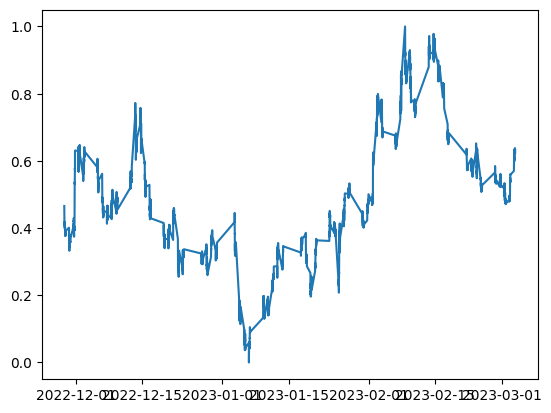

In [9]:
import matplotlib.pyplot as plt

plt.plot(df_scalled.index, df_scalled["close_scalled"])

In [21]:
df_scalled.head(10)

,close_scalled
datetime,
2022-11-28 14:30:00,0.465751
2022-11-28 14:35:00,0.461113
2022-11-28 14:40:00,0.457545
2022-11-28 14:45:00,0.457010
2022-11-28 14:50:00,0.453443
2022-11-28 14:55:00,0.448983
2022-11-28 15:00:00,0.452551
2022-11-28 15:05:00,0.442026
2022-11-28 15:10:00,0.438280


In [32]:
def creat_window_df(df):
    target_df = pd.DataFrame(index=df.index)
    for i in range(1, 6):
        target_df[f'close_scalled Lag {i}'] = df['close_scalled'].shift(i)
    target_df['Target'] = df['close_scalled']
    target_df = target_df.dropna()
    return target_df

In [33]:
window_df = creat_window_df(df_scalled)

In [34]:
window_df

,close_scalled Lag 1,close_scalled Lag 2,close_scalled Lag 3,close_scalled Lag 4,close_scalled Lag 5,Target
datetime,,,,,,
2022-11-28 14:55:00,0.453443,0.457010,0.457545,0.461113,0.465751,0.448983
2022-11-28 15:00:00,0.448983,0.453443,0.457010,0.457545,0.461113,0.452551
2022-11-28 15:05:00,0.452551,0.448983,0.453443,0.457010,0.457545,0.442026
2022-11-28 15:10:00,0.442026,0.452551,0.448983,0.453443,0.457010,0.438280
2022-11-28 15:15:00,0.438280,0.442026,0.452551,0.448983,0.453443,0.433286
...,...,...,...,...,...,...
2023-03-03 20:35:00,0.628969,0.622726,0.622191,0.620942,0.626828,0.630931
2023-03-03 20:40:00,0.630931,0.628969,0.622726,0.622191,0.620942,0.632893
2023-03-03 20:45:00,0.632893,0.630931,0.628969,0.622726,0.622191,0.629682


In [42]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.reset_index().to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

In [49]:
dates, X, y = windowed_df_to_date_X_y(window_df)

In [51]:
dates.shape, X.shape, y.shape

((5143,), (5143, 5, 1), (5143,))

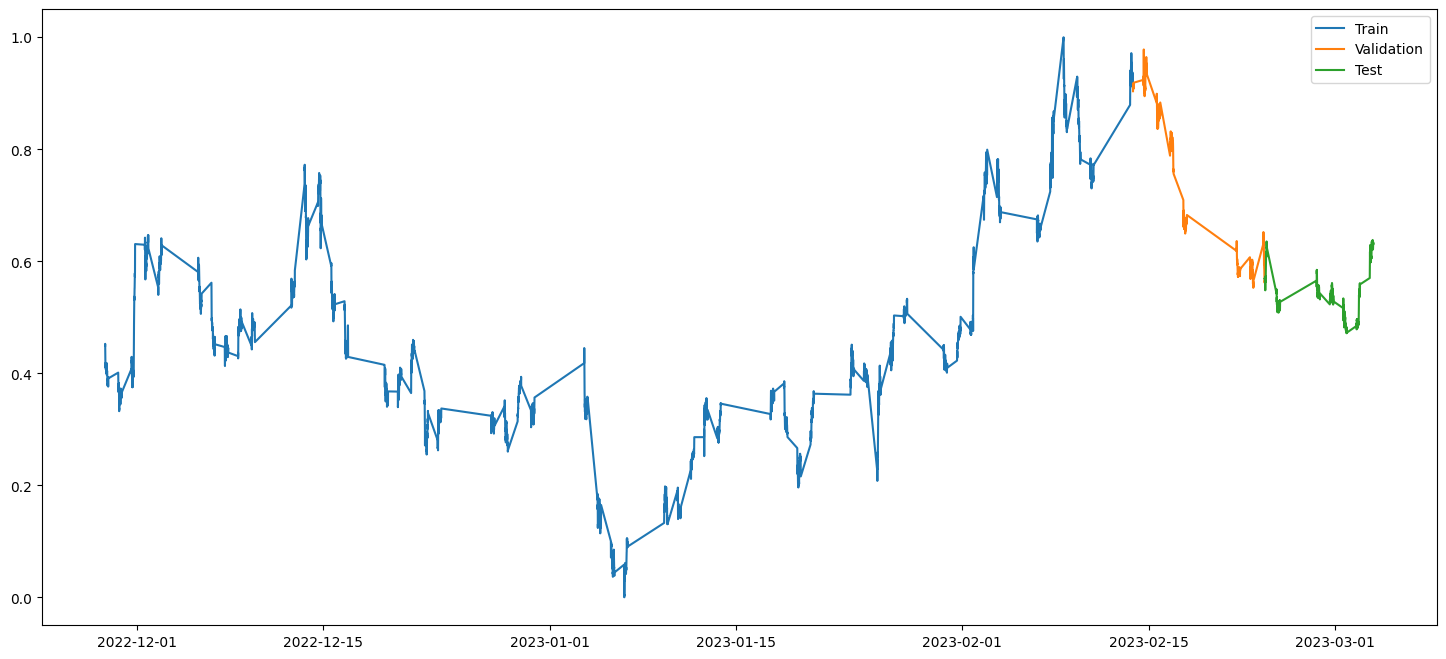

In [67]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(18, 8))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [59]:
model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
129/129 [==============================] - 4s 13ms/step - loss: 0.0188 - mean_absolute_error: 0.0740 - val_loss: 2.7144e-04 - val_mean_absolute_error: 0.0111
Epoch 2/100
129/129 [==============================] - 1s 9ms/step - loss: 2.6841e-04 - mean_absolute_error: 0.0101 - val_loss: 2.1792e-04 - val_mean_absolute_error: 0.0093
Epoch 3/100
129/129 [==============================] - 1s 9ms/step - loss: 2.6161e-04 - mean_absolute_error: 0.0098 - val_loss: 2.8921e-04 - val_mean_absolute_error: 0.0120
Epoch 4/100
129/129 [==============================] - 1s 10ms/step - loss: 2.5419e-04 - mean_absolute_error: 0.0096 - val_loss: 2.0840e-04 - val_mean_absolute_error: 0.0091
Epoch 5/100
129/129 [==============================] - 1s 9ms/step - loss: 2.5739e-04 - mean_absolute_error: 0.0098 - val_loss: 2.1483e-04 - val_mean_absolute_error: 0.0094
Epoch 6/100
129/129 [==============================] - 1s 9ms/step - loss: 2.5048e-04 - mean_absolute_error: 0.0096 - val_loss: 1.9844e-0

129/129 [==============================] - 1s 9ms/step - loss: 1.7103e-04 - mean_absolute_error: 0.0082 - val_loss: 1.0858e-04 - val_mean_absolute_error: 0.0065
Epoch 49/100
129/129 [==============================] - 1s 9ms/step - loss: 1.6162e-04 - mean_absolute_error: 0.0079 - val_loss: 1.3386e-04 - val_mean_absolute_error: 0.0078
Epoch 50/100
129/129 [==============================] - 1s 8ms/step - loss: 1.8218e-04 - mean_absolute_error: 0.0088 - val_loss: 1.1310e-04 - val_mean_absolute_error: 0.0067
Epoch 51/100
129/129 [==============================] - 1s 9ms/step - loss: 1.6157e-04 - mean_absolute_error: 0.0079 - val_loss: 3.7565e-04 - val_mean_absolute_error: 0.0165
Epoch 52/100
129/129 [==============================] - 1s 8ms/step - loss: 1.7027e-04 - mean_absolute_error: 0.0083 - val_loss: 1.3881e-04 - val_mean_absolute_error: 0.0084
Epoch 53/100
129/129 [==============================] - 1s 9ms/step - loss: 1.8034e-04 - mean_absolute_error: 0.0086 - val_loss: 1.4530e-04 - v

129/129 [==============================] - 1s 9ms/step - loss: 1.6117e-04 - mean_absolute_error: 0.0080 - val_loss: 9.9934e-05 - val_mean_absolute_error: 0.0062
Epoch 96/100
129/129 [==============================] - 1s 11ms/step - loss: 1.7090e-04 - mean_absolute_error: 0.0083 - val_loss: 9.9424e-05 - val_mean_absolute_error: 0.0061
Epoch 97/100
129/129 [==============================] - 2s 12ms/step - loss: 1.5922e-04 - mean_absolute_error: 0.0081 - val_loss: 1.6703e-04 - val_mean_absolute_error: 0.0100
Epoch 98/100
129/129 [==============================] - 1s 11ms/step - loss: 1.6878e-04 - mean_absolute_error: 0.0084 - val_loss: 2.5645e-04 - val_mean_absolute_error: 0.0134
Epoch 99/100
129/129 [==============================] - 1s 11ms/step - loss: 1.5760e-04 - mean_absolute_error: 0.0079 - val_loss: 1.0529e-04 - val_mean_absolute_error: 0.0062
Epoch 100/100
129/129 [==============================] - 1s 11ms/step - loss: 1.4099e-04 - mean_absolute_error: 0.0072 - val_loss: 2.0605e-

129/129 [==============================] - 2s 4ms/step


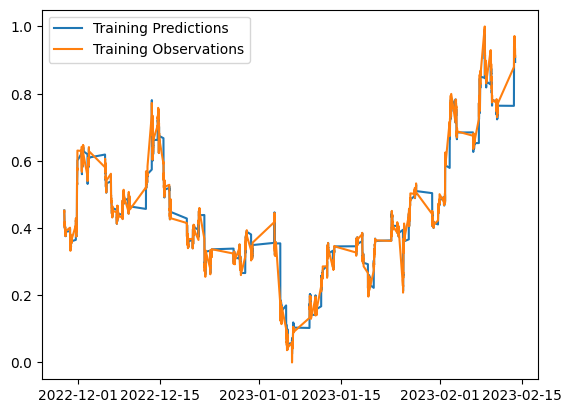

In [60]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 5ms/step


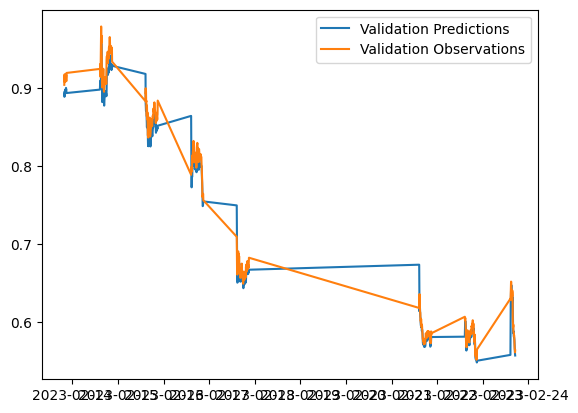

In [61]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

17/17 [==============================] - 0s 4ms/step


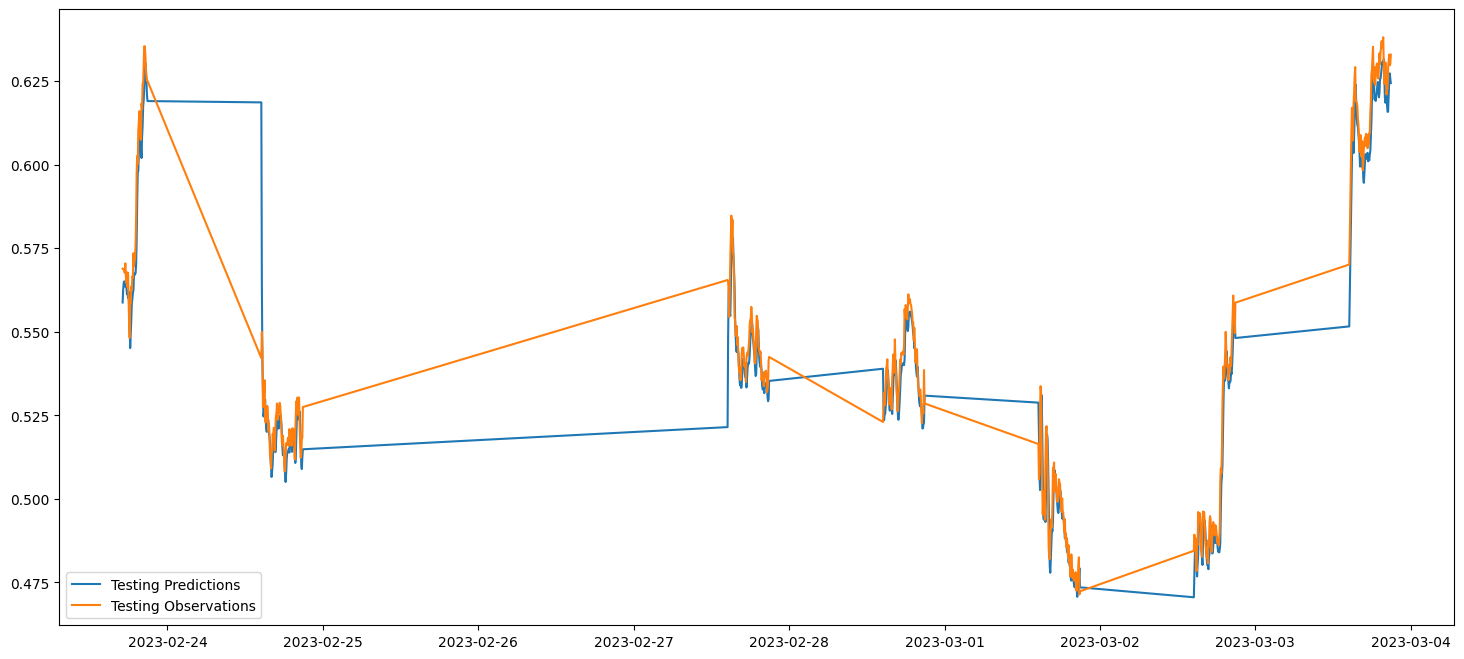

In [66]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(18, 8))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

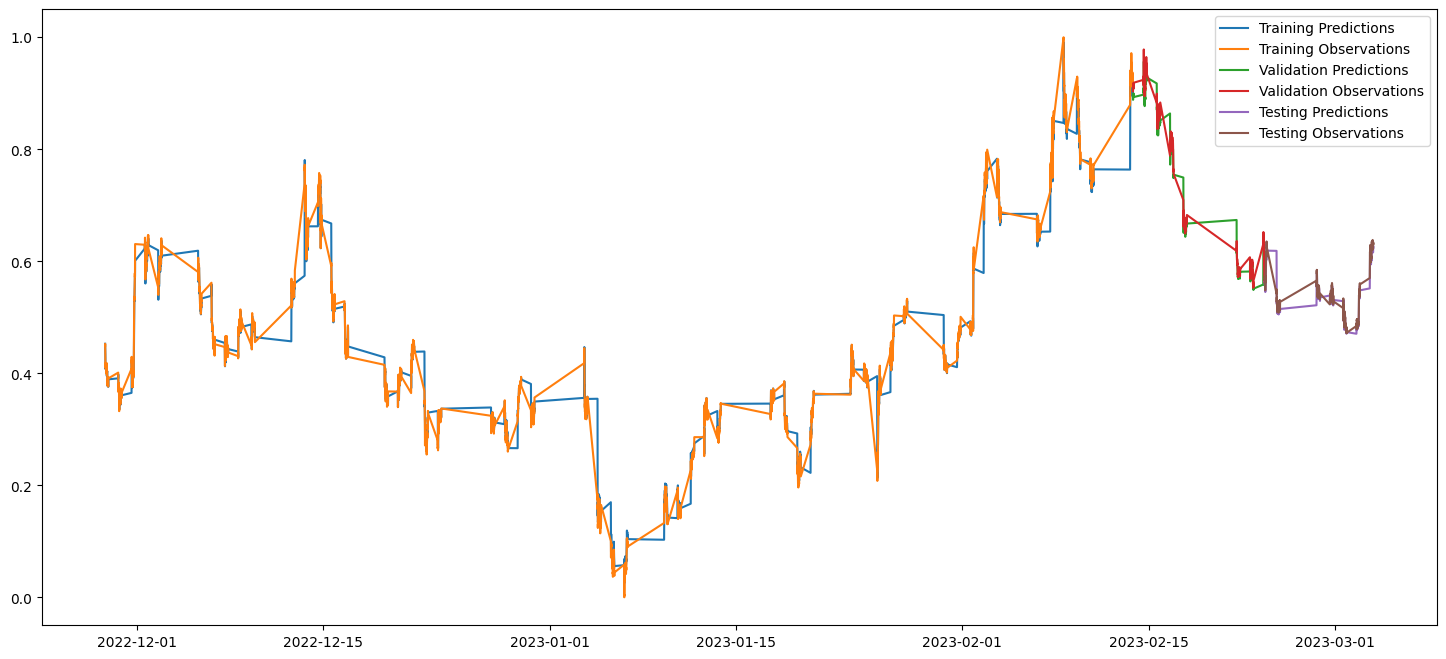

In [65]:
plt.figure(figsize=(18, 8))

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])